<a href="https://colab.research.google.com/github/harditsingh/IntroDataScience/blob/master/Group%20Presentation/Presentation%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score as evs
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from statistics import mean

Importing the dataset from the Github repo here, original source: https://archive.ics.uci.edu/ml/datasets/Balance+Scale.

In [28]:
column_names = ['class_name', 'left_weight', 'left_distance', 'right_weight', 'right_distance']
dataset = pd.read_csv('https://raw.githubusercontent.com/harditsingh/IntroDataScience/master/Group%20Presentation/balance-scale.csv', header=None,
names=column_names)

print ("Dataset Shape: ", dataset.shape)
dataset.head()
# dataset.info()
# dataset['class_name'].value_counts()

Dataset Shape:  (625, 5)


,class_name,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [0]:
data_cols = ['left_weight', 'right_weight', 'left_distance', 'right_distance']
target_cols = ['class_name']

X = dataset[data_cols] 
y = dataset[target_cols]

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

# Decision Tree Classifier

In [31]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [32]:
y_pred_dt = decision_tree.predict(X_test)
y_pred_dt

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [33]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_dt)*100)

Accuracy is  70.74468085106383


# Random Forest Classifier

In [34]:
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=3, random_state=100, min_samples_leaf=5)
random_forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [35]:
y_pred_rf = random_forest.predict(X_test)
y_pred_rf

array(['L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'L',
       'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L',
       'L', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R

In [36]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_rf)*100)

Accuracy is  82.4468085106383


In [37]:
print("=== Classification Report Decision Tree ===")
print(metrics.classification_report(y_pred_dt, y_test))
print("=== Classification Report Random Forest ===")
print(metrics.classification_report(y_pred_rf, y_test))


=== Classification Report Decision Tree ===
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
           L       0.74      0.71      0.72        89
           R       0.78      0.71      0.74        99

    accuracy                           0.71       188
   macro avg       0.51      0.47      0.49       188
weighted avg       0.76      0.71      0.73       188

=== Classification Report Random Forest ===
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
           L       0.92      0.80      0.86        97
           R       0.86      0.85      0.85        91

    accuracy                           0.82       188
   macro avg       0.59      0.55      0.57       188
weighted avg       0.89      0.82      0.85       188



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

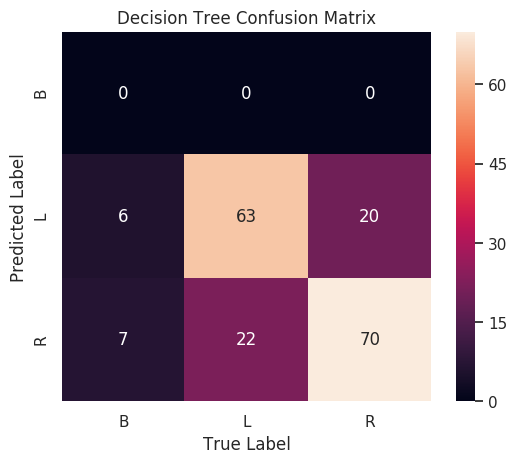

In [38]:
mat1 = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ['B', 'L', 'R'] # labels for x-axis
y_axis_labels = ['B', 'L', 'R'] # labels for y-axis
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Decision Tree Confusion Matrix")
y_pred_dt


array(['L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'L',
       'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L',
       'L', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R

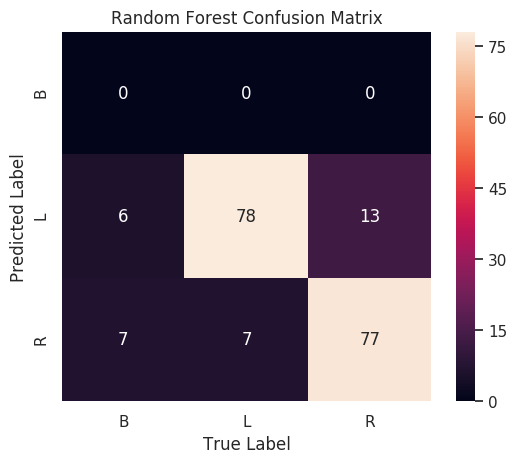

In [39]:

mat2 = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ['B', 'L', 'R'] # labels for x-axis
y_axis_labels = ['B', 'L', 'R'] # labels for y-axis
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Random Forest Confusion Matrix")
y_pred_rf

In [0]:
# new feature (weight and lengths)
dataset['left_multi'] = dataset['left_distance'] * dataset['left_weight']
dataset['right_multi'] = dataset['right_distance'] * dataset['right_weight']

In [41]:

new_data_cols = ['left_weight', 'right_weight', 'left_distance', 'right_distance', 'left_multi', 'right_multi']
new_target_cols = ['class_name']

X = dataset[new_data_cols]
y = dataset[new_target_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test, y_predict)*100)


Accuracy is  89.8936170212766


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [42]:
#new feature ratio
new_data_cols = ['left_weight', 'right_weight', 'left_distance', 'right_distance', 'left_multi', 'right_multi', 'left_right_ratio']
new_target_cols = ['class_name']

dataset['left_right_ratio'] = dataset['left_multi']/dataset['right_multi']
dataset.head()

,class_name,left_weight,left_distance,right_weight,right_distance,left_multi,right_multi,left_right_ratio
0,B,1,1,1,1,1,1,1.000000
1,R,1,1,1,2,1,2,0.500000
2,R,1,1,1,3,1,3,0.333333
3,R,1,1,1,4,1,4,0.250000
4,R,1,1,1,5,1,5,0.200000


In [43]:
X = dataset[new_data_cols]
y = dataset[new_target_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

new_forest = RandomForestClassifier()
new_forest.fit(X_train, y_train)

y_predict = new_forest.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test, y_predict)*100)

Accuracy is  99.46808510638297


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array(['L', 'L', 'R', 'L', 'R', 'B', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'R', 'R', 'L', 'L', 'B', 'L', 'R', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'B',
       'B', 'R', 'R', 'R', 'L', 'L', 'B', 'R', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'B', 'B', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'B', 'L', 'B', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'B', 'B',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'B', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'B', 'R', 'R', 'L', 'R', 'B', 'L', 'R', 'R', 'R

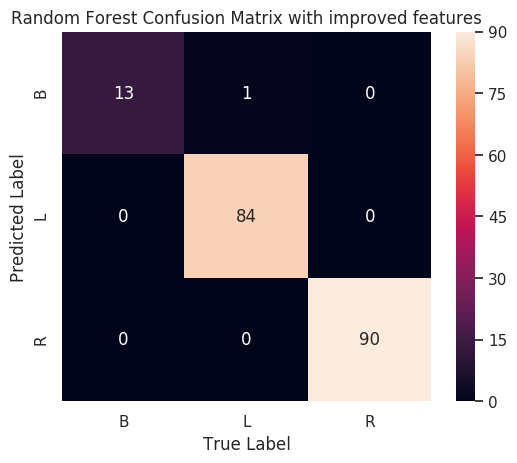

In [44]:
mat3 = confusion_matrix(y_test, y_predict)
x_axis_labels = ['B', 'L', 'R'] # labels for x-axis
y_axis_labels = ['B', 'L', 'R'] # labels for y-axis
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Random Forest Confusion Matrix with improved features")
y_predict

In [45]:
# feature importance 
features_dict = {}
for i in range(len(new_forest.feature_importances_)):
    features_dict[new_data_cols[i]] = new_forest.feature_importances_[i]
sorted(features_dict.items(), key=lambda x:x[1], reverse=True)
features_dict

{'left_distance': 0.022842870194881897,
 'left_multi': 0.09318881905862561,
 'left_right_ratio': 0.6453711004967974,
 'left_weight': 0.024717782978746515,
 'right_distance': 0.038342536427748625,
 'right_multi': 0.13973080848783861,
 'right_weight': 0.03580608235536146}

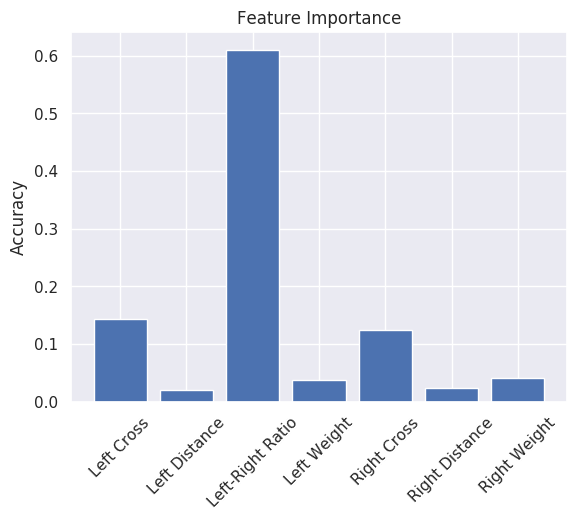

In [46]:
objects = ('Left Cross', 'Left Distance', 'Left-Right Ratio', 'Left Weight', 'Right Cross', 'Right Distance', 'Right Weight')
y_pos = np.arange(len(objects))
performance = [0.14298452269784603,0.02003313945803681,0.6106165710667104,0.037996692789501844,0.12392362500030969,0.02375010501125672,0.040695343976338526]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Feature Importance')
plt.xticks(rotation=45)

plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

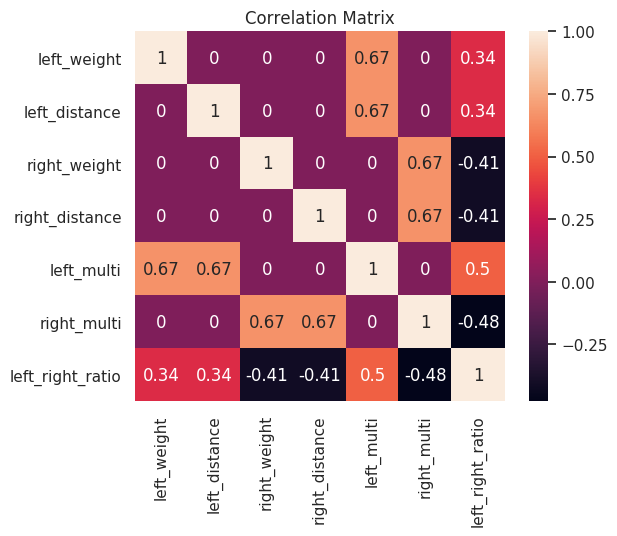

In [47]:
corrmat = dataset.corr()
sns.heatmap(corrmat, square=True, annot=True)
plt.title("Correlation Matrix")